In [1]:
import pandas as pd
from code.constants import TARGET_COL, SELECTED_FEATURES
# Load the dataset
data_path = './data/shooting_stats_extended.csv'
df = pd.read_csv(data_path)
df = df[[TARGET_COL, *SELECTED_FEATURES]]

SVM Results:
    mse_avg: 0.002
    r2_avg: -0.607
    


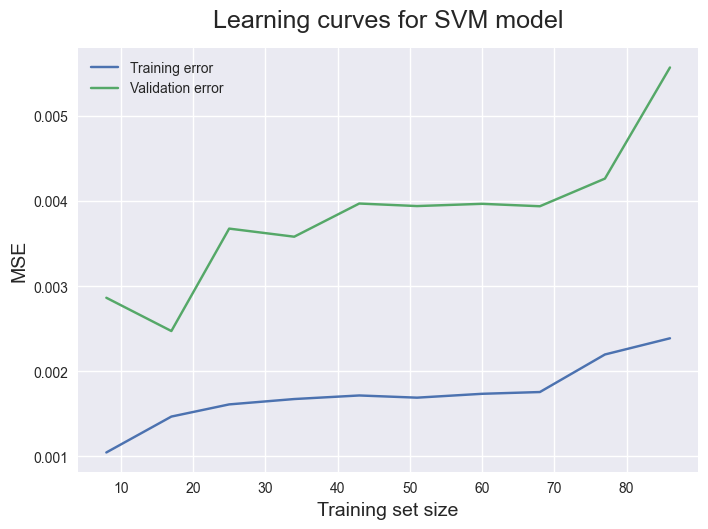

In [23]:
from code.prediction.ML.SVM import SVM

# Instantiate and train the SVM model
svm_model = SVM(kernel="poly", degree=3, gamma='auto', C=.2, epsilon=.1)
svm_model.set_data(df.copy(), TARGET_COL)
svm_results = svm_model.get_avg_metrics_for_n_iterations(1000, 0.2)
print(f"""SVM Results:
    mse_avg: {svm_results[0]}
    r2_avg: {svm_results[1]}
    """)

# Generate learning curve
svm_model.get_learning_curve()

The results for NN with settings:
        ------------------------------------------------
        Solver: adam
        Activation: relu
        Alpha: 0.4
        Hidden Layer Dimensions: (10, 10, 10)
        Fixed seed: True
        Test Set Percentage: 0.2
        ------------------------------------------------
        
        MSE: 0.0027441555428172355
        R2 Score: -0.8512439685155475
        


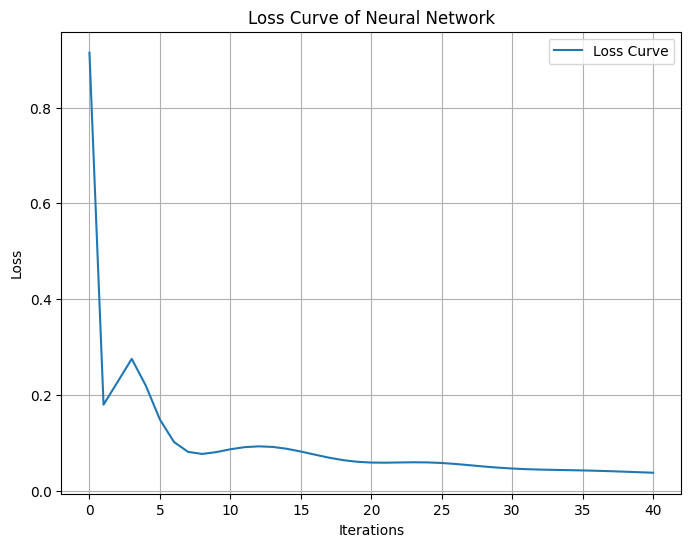

In [13]:
from code.prediction.ML.NeuralNetwork import NeuralNetwork

# Instantiate and train the Neural Network model
neural_network_model = NeuralNetwork()

# Set parameters for the neural network
alpha = 0.4
hidden_layer_sizes = (10,10,10)
activation = 'relu'
solver = 'adam'

# Train the model and get performance statistics
neural_network_model.get_avg_metrics_for_n_iterations(df.copy(), alpha, hidden_layer_sizes, activation, solver, 0.2, TARGET_COL, is_fixed=True, n_iterations=100)

# Generate and display plots
neural_network_model.plot_loss_curve()

Random Forest Results:
    mse_avg: 0.001
    r2_avg: 0.264
    


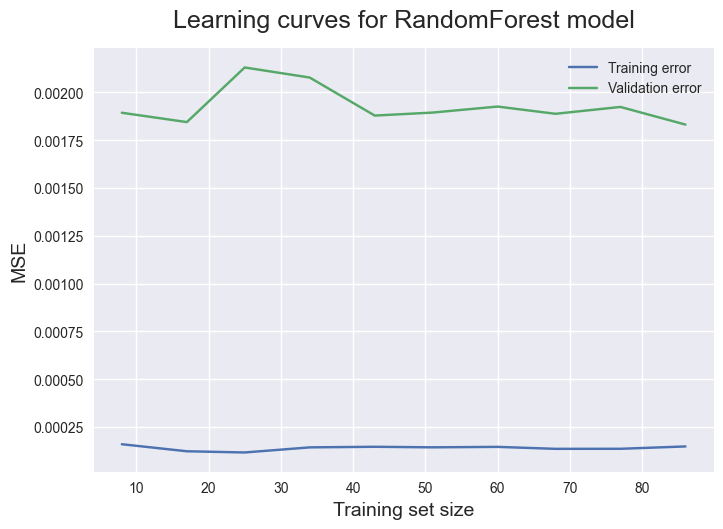

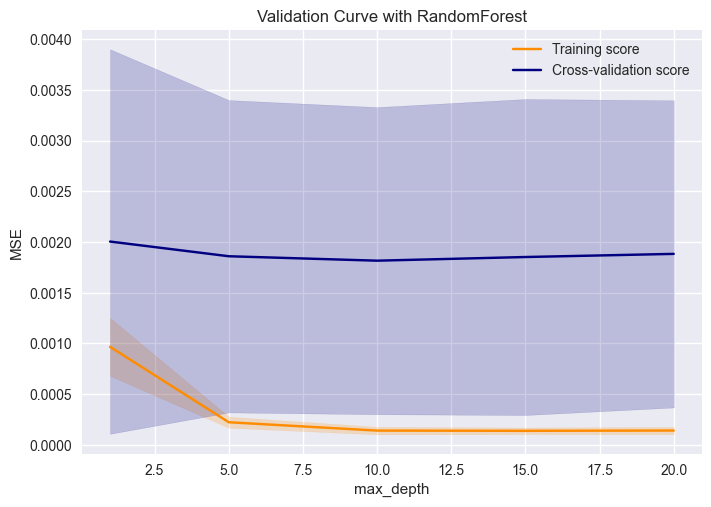

In [25]:
from code.prediction.ML.RandomForest import RandomForest

# Instantiate and train the Decision Tree model
random_forest_model = RandomForest()
random_forest_model.set_data(df.copy(), TARGET_COL)
random_forest_results = random_forest_model.get_avg_metrics_for_n_iterations(1000, 0.25)
print(f"""Random Forest Results:
    mse_avg: {random_forest_results[0]}
    r2_avg: {random_forest_results[1]}
    """)

# Generate learning curve
random_forest_model.get_learning_curve()

# Generate validation curve (specify the parameter and its range)
random_forest_model.get_validation_curve(param_name="max_depth", param_range=[1, 5, 10, 15, 20])


Linear Regression Results:
    mse_avg: 0.001
    r2_avg: 0.331
    


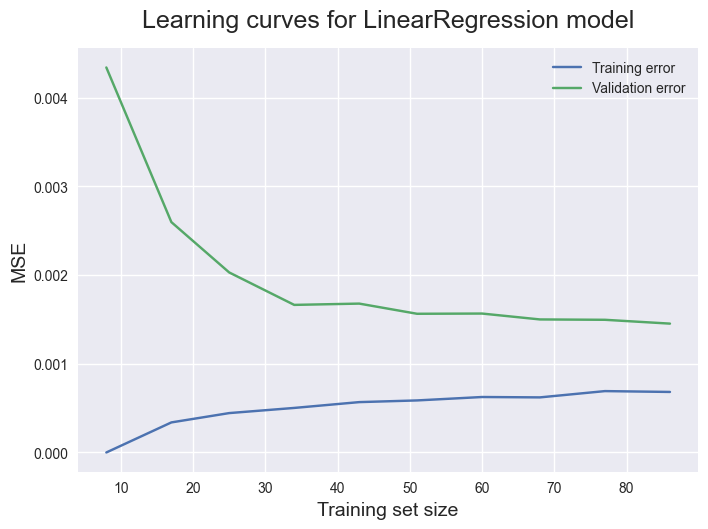

In [21]:
from code.prediction.ML.LinearRegression import LinearRegression

# Instantiate and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.set_data(df.copy(), TARGET_COL)
linear_regression_results = linear_regression_model.get_avg_metrics_for_n_iterations(1000, 0.25)
print(f"""Linear Regression Results:
    mse_avg: {linear_regression_results[0]}
    r2_avg: {linear_regression_results[1]}
    """)

# Generate learning curve
linear_regression_model.get_learning_curve()